In [1]:
from numpy import pi, log, sqrt
import pypolychord
from pypolychord.settings import PolyChordSettings
from pypolychord.priors import UniformPrior

Define a four-dimensional spherical gaussian likelihood,
 width sigma=0.1, centered on the 0 with one derived parameter.
 The derived parameter is the squared radius

In [2]:
nDims = 4
nDerived = 1
sigma = 0.1

def likelihood(theta):
    """ Simple Gaussian Likelihood"""

    nDims = len(theta)
    r2 = sum(theta**2)
    logL = -log(2*pi*sigma*sigma)*nDims/2.0
    logL += -r2/2/sigma/sigma

    return logL, [r2]

Define a box uniform prior from -1 to 1

In [3]:
def prior(hypercube):
    """ Uniform prior from [-1,1]^D. """
    return UniformPrior(-1, 1)(hypercube)

Optional dumper function giving run-time read access to
 the live points, dead points, weights and evidences

In [4]:
def dumper(live, dead, logweights, logZ, logZerr):
    print("Last dead point:", dead[-1])

Initialise the settings

In [5]:
settings = PolyChordSettings(nDims, nDerived)
settings.file_root = 'gaussian'
settings.nlive = 200
settings.do_clustering = True
settings.read_resume = False

Run PolyChord

In [6]:
output = pypolychord.run_polychord(likelihood, nDims, nDerived, settings, prior, dumper)

Last dead point: [  -0.12195646    0.37405823   -0.74549651   -0.57059283    1.03613417
 -107.50194883  -46.27212213]
Last dead point: [ -0.52163002  -0.06336759  -0.43192652   0.38364359   0.60985625
 -41.35375964 -24.95822646]
Last dead point: [ -0.37403331   0.03735235  -0.32821553  -0.31645229   0.3491636
 -19.55187971 -11.92359365]
Last dead point: [-0.11967879  0.22564894  0.34498611  0.12669236  0.20030682 -7.93394934
 -4.480755  ]
Last dead point: [ 0.15947558 -0.17120628  0.21292861 -0.12136559  0.11481225 -0.97442395
 -0.20602622]
Last dead point: [-0.05449124 -0.24856098  0.053324   -0.05999985  0.07119528  1.95448519
  1.97482204]
Last dead point: [ 0.11354188  0.04542128  0.04324486  0.15991583  0.04239804 -0.65204203
  3.41468411]
Last dead point: [0.03245751 0.08394396 0.12165265 0.04758947 0.0251642  4.03292303
 4.2763761 ]
Last dead point: [ 0.05227755 -0.01961902 -0.06877328 -0.08374121  0.0148602   4.42213521
  4.79157616]
Last dead point: [7.75444943e-02 3.43045989e

Create a paramnames file

In [7]:
paramnames = [('p%i' % i, r'\theta_%i' % i) for i in range(nDims)]
paramnames += [('r*', 'r')]
output.make_paramnames_files(paramnames)

Make an anesthetic plot (could also use getdist)

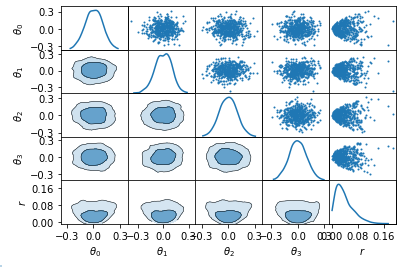

In [8]:
try:
    from anesthetic import NestedSamples
    samples = NestedSamples(root= settings.base_dir + '/' + settings.file_root)
    fig, axes = samples.plot_2d(['p0','p1','p2','p3','r'])
    fig.savefig('posterior.pdf')

except ImportError:
    try:
        import getdist.plots
        posterior = output.posterior
        g = getdist.plots.getSubplotPlotter()
        g.triangle_plot(posterior, filled=True)
        g.export('posterior.pdf')
    except ImportError:
        print("Install matplotlib and getdist for plotting examples")

    print("Install anesthetic or getdist  for for plotting examples")